# Explorando pandas

In [47]:
import numpy as np #importo numpy
import pandas as pd #importo pandas
# Le indica a jupyter que generen las figuras dentro del notebook
%matplotlib inline 
import matplotlib.pyplot as plt #importo matplotlib
np.set_printoptions(precision=3)


In [48]:
data_mensual = pd.read_csv('elect_mens.csv', delimiter=',')
year = data_mensual['indice_tiempo'].str[:4]
month = data_mensual['indice_tiempo'].str[5:7]

data_mensual['mes'] = month
data_mensual.index = year
data_mensual.drop('indice_tiempo', axis=1, inplace=True)
data_mensual.head()




,demanda_total,demanda_residencial,comercio_e_industria,grandes_usuarios,temperatura_promedio,potencia_maxima,ede_tucuman,edelap_sa,edenor_distribuidor,edesal_distribuidor,...,energia_de_entre_rios_sa,energia_de_mendoza_sa,energia_san_juan_sa_exedessa,epec_distribuidor,epen_distribuidor,epesf_distribuidor,recursos_y_energia_formosa_sa,secheep,spse_santa_cruz,mes
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2001,6866.26,NaN,NaN,NaN,25.432,13501.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
2001,6473.10,NaN,NaN,NaN,25.596,14061.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02
2001,6952.30,NaN,NaN,NaN,22.852,13780.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03
2001,6183.35,NaN,NaN,NaN,18.317,12866.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04
2001,6668.94,NaN,NaN,NaN,14.306,12968.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05


#### Habiamos visto que una forma de generar un histograma era con la funcion plt.hist()

[25.432 25.596 22.852 18.317 14.306 12.94  11.542 15.055 14.69  18.074
 20.007 23.013 24.903 23.252 22.18  17.463 16.432 10.7   11.469 14.242
 14.787 19.9   21.39  22.758 23.81  23.296 22.403 17.387 15.284 13.043
 11.081 12.068 14.623 18.955 20.303 21.539 25.071 23.186 23.555 19.9
 13.3   13.4   12.4   13.8   16.1   17.5   19.8   23.3   25.872 25.593
 21.237 17.223 14.939 14.3   12.4   13.    14.3   17.2   22.    22.3
 24.6   24.3   20.6   19.1   14.1   13.2   14.3   12.4   15.6   19.8
 20.5   24.4   24.6   24.6   22.2   18.8   12.7   10.9    9.3   10.1
 17.    19.2   18.8   23.6   25.6   25.3   22.1   19.    15.7   11.8
 14.3   13.    14.6   18.1   24.8   24.3   25.8   24.6   23.6   19.6
 16.4   11.6   10.8   15.6   13.6   17.7   21.1   22.6   26.1   24.2
 23.1   17.2   15.2   12.5   10.7   11.9   15.3   17.2   20.9   22.5
 25.8   24.    22.5   18.9   14.8   12.1   11.2   11.5   16.2   17.3
 22.6   22.9   26.2   24.8   21.7   18.1   16.9   12.2    9.9   13.7
 15.6   18.3   22.4   24.5

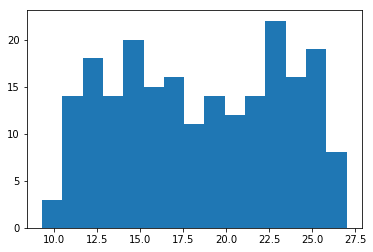

In [49]:
print(data_mensual.loc[:, 'temperatura_promedio'].values)
plt.hist(data_mensual.loc[:, 'temperatura_promedio'].values,bins = 15)
plt.show()

In [50]:
mes = data_mensual.groupby('mes')['temperatura_promedio'].mean().index.values.astype(int)
temp_media = data_mensual.groupby('mes')['temperatura_promedio'].mean().values

print(mes)
print(temp_media)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[25.388 24.512 22.107 18.738 15.109 12.388 11.761 13.376 15.283 18.202
 21.106 23.628]


#### Pero hay más de una forma generar figuras con pyplot
#### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
<b>Noten que ademas de generar una figura, las funciones devuelven distintos objetos</b>

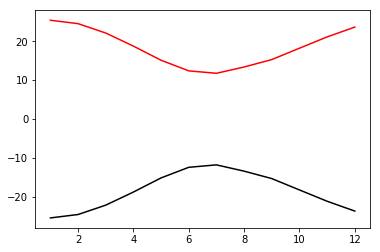

In [51]:
# Llamando directamente al 'graficador':
plt.plot(mes, temp_media, 'r', mes, -temp_media, 'k')
# devuelve una lista (por eso estan los corchetes) de lineas (los objetos que están siendo dibujados)


#### Creando solo una instancia de Axes (el lugar donde se generan los graficos) y ploteando en los Axes
#### Cuando graficamos de a pares es mas facil modificar las propiedades de esa linea
#### (Axes != Axis)

<class 'matplotlib.axes._subplots.AxesSubplot'>


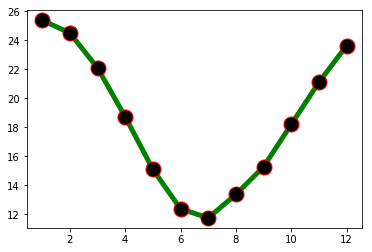

In [62]:

ax = plt.subplot()
print(type(ax))
ax.plot(mes, temp_media, color='g', linewidth=5, linestyle='-', marker='.',
       markersize=30, markerfacecolor='k', markeredgecolor='r')

## O por ultimo ( y el mas recomendado en general) creando una figura, poniendole axes, y graficando lineas o puntos

In [1]:

fig = plt.figure()
print(type(fig))
## add subplot subdivide la figura en dos espacios con numero de filas, numero de columnas, ubicacion
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# # Y hasta podriamos superponer axes 
# ax3 = fig.add_subplot(212)

ax1.plot(mes, temp_media, color='g', linewidth=5, linestyle='-', marker='.',
       markersize=30, markerfacecolor='k', markeredgecolor='r')

NameError: name 'plt' is not defined

#### Para todo lo graficado en el Notebook, como podemos ver queda en una celda y no podemos alterarlo en otro, tiene un poco menos de funcionalidad. Pero si sacamos las figuras como ventanas separadas se puede ver mejor como funciona

In [70]:
%matplotlib --list
plt.switch_backend('agg')
%matplotlib qt5
%matplotlib agg

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [77]:
fig1, ax1 = plt.subplots(2,1)
fig2, ax2 = plt.subplots(2,1)
print(ax1)
print(ax2)

In [78]:
ax1[0].scatter(data_mensual['temperatura_promedio'], data_mensual['demanda_total'], color='g', s=1000, marker='$hola$')
ax1[1].scatter(data_mensual['temperatura_promedio'], data_mensual['demanda_total'], color='g', s=500, marker='4')
ax2[1].plot(mes, temp_media, color='g', linewidth=10, linestyle=':', marker='.',
       markersize=30, markerfacecolor='r', markeredgecolor='b', label='temperatura media')

In [79]:
fig2.suptitle('Este es el titulo de la segunda figura')
ax1[0].set_title('Este es el titulo del primer ax de la primer figura')
ax1[0].legend()
# el método legend() levanta las etiquetas de cada plot (labels) 
# y la incluye ya sea en el ax, o en la figura
ax2[1].legend()
fig2.legend()
ax2[0].set_xlabel('puedo etiquetar el eje x')
ax2[0].set_ylabel('puedo etiquetar el eje y')
ax2[0].set_title('este es el titutlo del primer ax, segunda figura')

Text(0.5, 1.0, 'este es el titutlo del primer ax, segunda figura')

In [81]:
## También puedo hacer que las figuras compartan los valores de los ejes

# fig, ax = plt.subplots(4,1, sharex=True, sharey=True)
fig, ax = plt.subplots(4,1, sharex=True, sharey=True)

In [82]:
for i in range(ax.shape[0]):
    year = str(2005 + i)    
    ax[i].plot(data_mensual.loc[data_mensual.index==year, 'mes'], 
               data_mensual.loc[data_mensual.index==year, 'temperatura_promedio'], label=year, marker=4)
    ax[i].grid()